## Manejo de datos: Análisis y su Visualización
En el siguiente código se puede encontrar la información sobre el análisis de datos del PBI de países en el año 2022 y las sedes que Argentina tiene en cada país. Para ello se importaron los dataframes correspondientes al l esque relacional diseñado según las fuentes de datos provistas, se llevó a cabo el proceso de aumentación de la calidad de datos y se realizaron las consultas de SQL debidas. Finalmente se generaron gráficos que permiten visualizar la información que se recopiló.

### Pregunta a responder:
¿Existe alguna relación entre el PBI (Producto Bruto Interno) por persona de cada país (año 2022) y la cantidad de sedes en el exterior que tiene Argentina en dicho país? 

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker   # Para agregar separador de miles
from matplotlib import rcParams # Para modificar el tipo de letra

import seaborn as sns

from pandasql import sqldf

In [3]:
# Cargamos el dataset correspondiente a Representaciones Argentinas - Datos básicos de las sedes
df_rep_basico = pd.read_csv('lista-sedes-datos-basicos.csv')

print(df_rep_basico.head())

  sede_id                   sede_desc_castellano  \
0   CALEG  Consulado  General  en  Porto  Alegre   
1   CANTO             Consulado  en  Antofagasta   
2   CAREN  Consulado  General  en  Punta  Arenas   
3   CASUN       Consulado  General  en  Asunción   
4   CATLA        Consulado  General  en  Atlanta   

                        sede_desc_ingles pais_iso_2 pais_iso_3  \
0  Consulate  General  in  PORTO  ALEGRE         BR        BRA   
1             Consulate  in  ANTOFAGASTA         CL        CHL   
2  Consulate  General  in  Punta  Arenas         CL        CHL   
3       Consulate  General  in  Asuncion         PY        PRY   
4        Consulate  General  in  Atlanta         US        USA   

                      pais_castellano                       pais_ingles  \
0  REPÚBLICA  FEDERATIVA  DEL  BRASIL  FEDERATIVE  REPUBLIC  OF  BRAZIL   
1                REPÚBLICA  DE  CHILE               REPUBLIC  OF  CHILE   
2                REPÚBLICA  DE  CHILE               REPUBLIC  OF 

In [4]:
# Auditoría: ¿Con cuántas sedes distintas nos encontramos?
lista_sedes_id = list(df_rep_basico['sede_id'].unique())

print(len(lista_sedes_id))

164


In [5]:
# Cargamos el dataset correspondiente a PBI per cápita de los países
# Obs: Hubo que modificar a mano el dataset original porque contenía texto adicional que complicaba su parseo
df_pbi = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_73.csv')

df_pbi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,141.385955,144.342434,148.774835,157.047580,166.849791,177.769086,...,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.053706,112.128417,117.814663,122.370114,130.700278,137.301801,...,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231


In [6]:
# Cargamos el dataset correspondiente a Representaciones Argentinas - Datos completos de las sedes
# Obs: Hubo que modificar a mano el dataset original porque contenía un registro con una columna de más: esta fue eliminada
df_rep_completo = pd.read_csv('lista-sedes-datos-completos.csv')

df_rep_completo.head()

,sede_id,sede_desc_castellano,sede_desc_ingles,pais_castellano,pais_ingles,region_geografica,pais_iso_2,pais_iso_3,pais_codigo_telefonico,ciudad_castellano,...,sitio_web,sitios_web_adicionales,redes_sociales,atencion_dia_desde,atencion_dia_hasta,atencion_hora_desde,atencion_hora_hasta,atencion_comentario,concurrencias,circunscripcion
0,CALEG,Consulado General en Porto Alegre,Consulate General in PORTO ALEGRE,REPÚBLICA FEDERATIVA DEL BRASIL,FEDERATIVE REPUBLIC OF BRAZIL,AMÉRICA DEL SUR,BR,BRA,55,Porto Alegre,...,caleg.cancilleria.gob.ar,NaN,https://twitter.com/ArgPortoAlegre // https:...,NaN,NaN,00:00:00,00:00:00,9 a 18 hs; Atención al público 9 a 15...,NaN,Aceguá; Água Santa; Agudo; Alto Alegre; ...
1,CANTO,Consulado en Antofagasta,Consulate in ANTOFAGASTA,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,AMÉRICA DEL SUR,CL,CHL,56,Antofagasta,...,https://canto.cancilleria.gob.ar/,NaN,https://www.facebook.com/Consulado-de-la-Rep%C...,Lunes,Viernes,09:30:00,14:00:00,Horario administrativo: 09:00 a 17:30 h,NaN,Región de Arica y Parinacota - Capital ...
2,CAREN,Consulado General en Punta Arenas,Consulate General in Punta Arenas,REPÚBLICA DE CHILE,REPUBLIC OF CHILE,AMÉRICA DEL SUR,CL,CHL,56,Punta Arenas,...,https://caren.cancilleria.gob.ar/,NaN,https://www.facebook.com/profile.php?id=100014...,NaN,NaN,NaN,NaN,09:00 a 14:00 (Atención al Público) a 1...,NaN,Región XII Magallanes y Antártica Chilena...
3,CASUN,Consulado General en Asunción,Consulate General in Asuncion,REPÚBLICA DEL PARAGUAY,REPUBLIC OF PARAGUAY,AMÉRICA DEL SUR,PY,PRY,595,Asunción,...,www.casun.mrecic.gov.ar,NaN,@ArgentinaEnAsuncion //,Lunes,Viernes,08:00:00,13:00:00,Horario de funcionarios hasta 15:00 hs.,NaN,"Departamentos de Boquerón, Alto Paraguay, P..."
4,CATLA,Consulado General en Atlanta,Consulate General in Atlanta,Estados Unidos de América,UNITED STATES OF AMERICA,AMÉRICA DEL NORTE,US,USA,1,Atlanta,...,www.catla.mrecic.gov.ar,NaN,NaN,NaN,NaN,NaN,NaN,de 9:00 a 14:00 hs (Público) - Oficina ...,NaN,"Estados de Alabama, Carolina del Sur, Geor..."


In [7]:
# Cargamos el dataset correspondiente a Representaciones Argentinas - Datos completos de las secciones de las sedes
df_rep_sedes = pd.read_csv('lista-secciones-sedes.csv')

df_rep_sedes.head()

,sede_id,sede_desc_castellano,sede_desc_ingles,tipo_seccion,nombre_titular,apellido_titular,cargo_titular,telefono_principal,telefonos_adicionales,celular_de_guardia,...,correo_electronico,correos_adicionales,sitio_web,sitios_web_adicionales,atencion_dia_desde,atencion_dia_hasta,atencion_hora_desde,atencion_hora_hasta,comentario_del_horario,temas
0,ECHES,Administración,Administrative Section,Seccion,María Verónica,Skerianz,Jefe de Sección Administrativa,NaN,NaN,NaN,...,eches@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,17:00:00,NaN,NaN
1,ERUNI,Administración,Administration,Seccion,María Carolina,Etcheverry,Agregada,NaN,NaN,NaN,...,eruni@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,18:00:00,NaN,NaN
2,EHAIT,Administración,Todo el territorio de Haiti,Seccion,Sergio Fabián,Pérez Godoy,Jefe de Sección Administrativa,509 2940-67/11/12/13/14,NaN,00 509 3676 0359,...,ehait@cancilleria.gob.ar,NaN,NaN,NaN,Lunes,Viernes,NaN,NaN,9.00 hs a 17.00 hs,NaN
3,EKENY,Administración,Administrative Section,Seccion,Ximena Inés,Toledo,Jefe/a de Oficina,NaN,NaN,NaN,...,ekeny@cancilleria.gob.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,16:00:00,NaN,NaN
4,ERUNI,Administración,Administracion,Seccion,Carlos Esteban,Pronato,Jefe de Sección,44 2073181300,NaN,NaN,...,eruni@mrecic.gov.ar,NaN,NaN,NaN,Lunes,Viernes,09:00:00,18:00:00,NaN,NaN


In [8]:
# Sede(sede_id <df_rep_basico> PK, sede_desc_castellano <df_rep_basico>, sede_tipo <df_rep_basico>,
# pais_iso_3 <df_rep_basico> (FK))

# Obtenemos las secciones de las sedes
secciones = df_rep_sedes[['sede_id']]

# Creamos la relacion sede planteada en el DER y esquema correspondiente para sede
sede = df_rep_basico[['sede_id', 'pais_iso_3', 'sede_tipo', 'sede_desc_castellano']]

# Renombramos los nombres de las columnas para que tengan los del esquema planteado
sede = sede.rename(columns = {'sede_id' : 'id', 'pais_iso_3':'cod_pais', 'sede_tipo':'tipo', 'sede_desc_castellano':'descripcion'})

# Agregamos columna cant_secciones
d_f_sede_seccion = secciones.groupby(['sede_id']).size().reset_index(name='cant_secciones')

# Renombramos los nombres de las columnas para que tengan los del esquema planteado
d_f_sede_seccion = d_f_sede_seccion.rename(columns = {'sede_id' : 'id'})

# Aplicamos un left outer join entre sede y d_f_sede_seccion para quedarnos con todas las sedes
# argentinas, más allá de si tienen secciones o no
sede = sede.merge(d_f_sede_seccion, how='left', on='id')

# Las sedes sin secciones por defecto vienen con el valor NaN en la columna cant_secciones. Reemplazamos
# este valor por 0
sede['cant_secciones'] = sede['cant_secciones'].fillna(0)
print(sede)

        id cod_pais       tipo  \
0    CALEG      BRA  Consulado   
1    CANTO      CHL  Consulado   
2    CAREN      CHL  Consulado   
3    CASUN      PRY  Consulado   
4    CATLA      USA  Consulado   
..     ...      ...        ...   
159  EURUG      URY   Embajada   
160  EVENE      VEN   Embajada   
161  EVIET      VNM   Embajada   
162  OCCAT      CHN  Consulado   
163  REPAL      PSE   Embajada   

                                           descripcion  cant_secciones  
0                Consulado  General  en  Porto  Alegre             0.0  
1                           Consulado  en  Antofagasta             0.0  
2                Consulado  General  en  Punta  Arenas             0.0  
3                     Consulado  General  en  Asunción             0.0  
4                      Consulado  General  en  Atlanta             0.0  
..                                                 ...             ...  
159                              Embajada  en  Uruguay             4.0  
160    

In [9]:
# Region(region_id** PK <creado por nosotros>, region_geografica <df_rep_completo>)

# Obtenemos las regiones del dataset original. Como vienen duplicadas, seleccionamos únicamente un
# representante de cada una
regiones = df_rep_completo['region_geografica'].drop_duplicates()

# region.shape[0] devuelve la cantidad de regiones distintas
ids_regiones = list(range(0, regiones.shape[0]))

# creamos la relacion regiones planteada en el DER y esquema correspondiente
regiones = {'id': ids_regiones, 'nombre': list(regiones)}
region = pd.DataFrame(regiones)

print(region)

   id                                   nombre
0   0                        AMÉRICA  DEL  SUR
1   1                      AMÉRICA  DEL  NORTE
2   2                       EUROPA  OCCIDENTAL
3   3                                     ASIA
4   4                     ÁFRICA  SUBSAHARIANA
5   5                                  OCEANÍA
6   6  ÁFRICA  DEL  NORTE  Y  CERCANO  ORIENTE
7   7              AMÉRICA  CENTRAL  Y  CARIBE
8   8             EUROPA  CENTRAL  Y  ORIENTAL


In [10]:
# Pais: (pais_iso_3 PK <df_pbi (Country Code)>, Country Name <df_pbi>, 2022 <df_pbi>,
# region_id <creado por nosotros> FK)

# Obtenemos los campos del dataset original: Country Code lo utilizaremos para cruzar los datos
# Calidad de datos: completitud en atributo 2022
info_paises_pbi = df_pbi[['Country Code', '2022']]

# Agregamos regiones geograficas
df_paises_rep_comp = pd.merge(info_paises_pbi, df_rep_completo, left_on='Country Code', right_on='pais_iso_3')
df_paises_rep_comp_regiones = pd.merge(df_paises_rep_comp, region, left_on='region_geografica', right_on='nombre')

# Extraemos las columnas que necesitamos para crear así la relacion pais planteada en el DER y esquema
# correspondiente
pais = df_paises_rep_comp_regiones[['Country Code', 'pais_castellano', '2022', 'id']]

# Renombramos los nombres de las columnas para que tengan los del esquema planteado
pais = pais.rename(columns = {'Country Code' : 'codigo', 'pais_castellano':'nombre', '2022':'pbi_2022', 'id': 'region_id'})


# Limpieza de Datos
# Eliminamos los registros repetidos
pais = pais.drop_duplicates()
print(pais.sort_values('codigo'))

# Valores vacios en pbi_2022. Eliminamos los registros de paises que no tienen info del pbi al 2022
pais = pais.dropna(subset=['pbi_2022'])
print(pais.sort_values('codigo'))

# Estandarizamos los nombres de paises: Pasamos todos a mayuscula
pais['nombre'] = pais['nombre'].astype(str).str.upper()
print(pais.sort_values('codigo'))

    codigo                                 nombre      pbi_2022  region_id
0      AGO                  REPÚBLICA  DE  ANGOLA   3000.444231          4
1      ARE               EMIRATOS  ÁRABES  UNIDOS  53707.980081          3
2      ARG                   REPÚBLICA  ARGENTINA  13650.604629          0
3      ARM                 REPÚBLICA  DE  ARMENIA   7018.051504          3
4      AUS                              AUSTRALIA  65099.845912          5
..     ...                                    ...           ...        ...
140    URY      REPÚBLICA  ORIENTAL  DEL  URUGUAY  20795.042354          0
148    USA           Estados  Unidos  de  América  76329.582265          1
157    VEN  REPÚBLICA  BOLIVARIANA  DE  VENEZUELA           NaN          0
158    VNM     REPÚBLICA  SOCIALISTA  DE  VIETNAM   4163.514299          3
159    ZAF               REPÚBLICA  DE  SUDÁFRICA   6766.481254          4

[89 rows x 4 columns]
    codigo                              nombre      pbi_2022  region_id
0    

In [11]:
# Red_Social(redes_sociales (links splitteados)*** PK <df_rep_completo>, sede_id <df_rep_completo> FK)

# Cargamos las posibles redes sociales utilizadas por las sedes diplomáticas que la Argentina tiene
# por el mundo
redes_sociales = ['twitter', 'facebook', 'instagram', 'linkedin', 'youtube', 'flickr', 'gmail']

sedes_ids = []
links = []

subset_redes = df_rep_completo[['redes_sociales', 'sede_id']]

# Limpiza de datos: Valores vacíos en redes_sociales
# Eliminamos los registros de sedes que no tienen info de redes sociales
subset_redes = subset_redes.dropna(subset=['redes_sociales'])

subset_redes['redes_sociales'] = subset_redes['redes_sociales'].astype('str')
subset_redes['sede_id'] = subset_redes['sede_id'].astype('str')

descartadas = []

for row in subset_redes.iterrows():
    # Obs: Cada row es una tupla
    # row[1][0] para indicar el link
    # row[1][1] para indicar la sede_id

    # Separamos las redes sociales y borramos espacios al principio y final
    redes_en_sede = row[1].iloc[0].split(' // ')
    redes_en_sede = row[1].iloc[0].split()

    for link in redes_en_sede:
        # Limpieza de datos
        # Únicamente nos quedamos con el link si este indica claramente a qué red social de las reconocidas pertenece

        if any(red in link for red in redes_sociales):
            sedes_ids.append(row[1].iloc[1])

            #if not link.startswith('https://'):
            #  links.append('https://' + link)
            # else:
            links.append(link)

        else:
            # Auditoría para saber cuáles fueron eliminados
            # Notar que agregará strings vacios y parte de la url de cada link
            descartadas.append(link)

# Creamos la relacion redes planteada en el DER y esquema correspondiente
redes = {'link': links, 'sede_id': list(sedes_ids)}

redes = pd.DataFrame(redes)
# Estandarización : nos aseguramos de que haya 'https://' al principio de cada link
# Se podría agregar www. al principio también, pero a veces los links tienen un subdominio distinto,
# así que para evitar romperlos lo dejamos así (de todos modos los links funcionan sin el subdominio)
redes['link'] = ['https://' + link if not link.startswith('https://') else link for link in redes['link']]

print(redes[redes['link'].str.contains('https://')])

# Auditoría
# Eliminamos los espacios que contienen los links eliminados
descartadas = list(map(lambda x: x.strip(), descartadas))
# Nos quedamos con todos aquellos descartados que no son ni strings vacios ni partes de urls
descartadas = [i for i in descartadas if i != 'https:' and i != '']
# print(descartadas)


                                                  link sede_id
0                   https://twitter.com/ArgPortoAlegre   CALEG
1     https://www.facebook.com/ArgentinaEnPortoAlegre/   CALEG
2          https://www.instagram.com/argenportoalegre/   CALEG
3    https://www.facebook.com/Consulado-de-la-Rep%C...   CANTO
4    https://www.facebook.com/profile.php?id=100014...   CAREN
..                                                 ...     ...
229  https://www.facebook.com/EmbajadaArgentinaEnVe...   EVENE
230          https://www.instagram.com/argenvenezuela/   EVENE
231       https://www.facebook.com/ArgentinaEnVietnam/   EVIET
232            https://www.instagram.com/argenvietnam/   EVIET
233            https://www.facebook.com/ArgEnPalestina   REPAL

[234 rows x 2 columns]


### Consultas en SQL
La idea para el item (i) es generar una tabla auxiliar "tabla_aux" que contenga los datos que vamos a precisar para obtener el reporte pedido en el enunciado. Es decir, c/ país con su nombre y PBI, junto con la cantidad de sedes y secciones ("cant_sedes_pais" y "secciones", respectivamente) que se encuentran en dicho país. De esta manera, en la consulta final ("tabla_ej_1") simplemente calculamos el cociente entre "secciones" y "cant_sedes_pais" para cada elemento de "tabla_aux" (y lo agregamos como columna llamada "secciones_promedio"), añadimos las otras columnas y le damos el orden requerido.

In [72]:
tabla_aux = sqldf('''
          SELECT 
              DISTINCT p.nombre, p.pbi_2022,
              ct_pais_sede.ct AS cant_sedes_pais,
              ct_pais_sec.secciones AS secciones
          FROM pais p
          INNER JOIN sede ON p.codigo = sede.cod_pais
          INNER JOIN (
              SELECT 
                  COUNT(*) AS ct, 
                  cod_pais AS codigo
              FROM sede s1
              GROUP BY cod_pais
          ) AS ct_pais_sede ON p.codigo = ct_pais_sede.codigo
          INNER JOIN (
              SELECT 
                  cod_pais,
                  SUM(cant_secciones) AS secciones
              FROM sede
              GROUP BY cod_pais
          ) AS ct_pais_sec ON ct_pais_sec.cod_pais = p.codigo
          ORDER BY secciones;          
          ''')

tabla_ej_1 = sqldf('''
                  SELECT
                      nombre AS Pais,
                      cant_sedes_pais AS sedes,
                      (secciones / cant_sedes_pais) AS secciones_promedio,
                      pbi_2022 AS PBI_2022
                  FROM tabla_aux
                  ORDER BY sedes DESC, Pais ASC;
          ''')

Para el item (ii) generamos nuevamente una tabla auxiliar "region_pais_tabla", que vincula los datos del dataframe "region" con los del DF "pais". Notar que el EXISTS asegura que todos los paises agregados a la tabla auxiliar tengan una sede en su territorio.
Finalmente, llamamos a la tabla auxiliar en la ultima consulta, calculando el PBI promedio (en 2022) y el numero de paises en c/ region (1er y 2do INNER JOIN, respectivamente)

In [73]:
region_pais_tabla = sqldf('''
                    SELECT 
                        r.id AS id_region, 
                        r.nombre AS nombre_region, 
                        p.region_id AS region_pais, 
                        p.codigo AS pais, 
                        p.pbi_2022
                    FROM region r
                    INNER JOIN pais p ON p.region_id = r.id 
                    AND EXISTS (
                            SELECT 
                                s.cod_pais
                            FROM sede s
                            WHERE s.cod_pais = p.codigo
                    );
            ''')

tabla_ej_2 = sqldf('''
            SELECT 
                DISTINCT r1.nombre_region AS region_geografica,
                counter.contador AS paises_con_sedes_arg,
                prom.pbi_region AS prom_pbi
            FROM region_pais_tabla AS r1    
            INNER JOIN (
                SELECT 
                    nombre_region, 
                    AVG(pbi_2022) AS pbi_region
                FROM region_pais_tabla
                GROUP BY nombre_region
            ) AS prom ON prom.nombre_region = r1.nombre_region
            INNER JOIN (
                SELECT 
                    nombre_region, 
                    COUNT(*) AS contador
                FROM region_pais_tabla
                GROUP BY nombre_region
            ) AS counter ON r1.nombre_region = counter.nombre_region    
            ORDER BY prom.pbi_region DESC
          ''')

_tabla_links_ es la tabla auxiliar que vamos a usar para los ultimos dos items. En esta guardamos el pais y codigo de pais de c/ sede, junto con la sede en cuestion, el URL de c/ perfil vinculado a ella (queda registrado como "link") y la red a la que pertenece ("red").

In [70]:
tabla_links = sqldf('''
            SELECT 
                s.cod_pais, 
                p.nombre,
                r.sede_id,
                COALESCE(
                    CASE 
                        WHEN r.link LIKE '%twitter%' THEN 'twitter'
                        WHEN r.link LIKE '%facebook%' THEN 'facebook'
                        WHEN r.link LIKE '%instagram%' THEN 'instagram'
                        WHEN r.link LIKE '%linkedin%' THEN 'linkedin'
                        WHEN r.link LIKE '%youtube%' THEN 'youtube'
                        WHEN r.link LIKE '%flickr%' THEN 'flickr'
                    END, 'gmail') AS red,
                r.link
            FROM redes AS r
            INNER JOIN sede AS s ON s.id = r.sede_id
            INNER JOIN pais AS p ON p.codigo = s.cod_pais
          ''')

Trabajando sobre el query "tabla_links", simplemente hacemos un conteo de la cantidad de redes distintas que tiene c/ pais.
IMPORTANTE: como un pais puede usar una misma red mas de una vez, tenemos que pedir previo al conteo que no haya tuplas repetidas de la forma (pais, red); por este motivo hacemos una subconsulta adicional que garantice esta condición, en vez de llamar directamente a "tabla_links".

In [68]:
tabla_ej_3 = sqldf('''
          SELECT 
              t.nombre, 
              COUNT(t.red) AS cant_redes
          FROM (
              SELECT DISTINCT nombre, red
              FROM tabla_links
          ) AS t
          GROUP BY nombre
          ORDER BY cant_redes DESC
          ''')

In [69]:
tabla_ej_4 = sqldf('''
          SELECT 
              DISTINCT nombre AS Pais, 
              sede_id AS Sede, 
              red AS Red_Social, 
              link AS URL
          FROM tabla_links
          ORDER BY Pais ASC, Sede ASC, Red_Social ASC, URL ASC
          ''')

### Visualización de las tablas creadas en SQL

In [74]:
print("################   TABLA PARA EL EJERCICIO 1 DE CONSULTAS SQL   ################")
print(tabla_ej_1.head(10))
print("################   TABLA PARA EL EJERCICIO 2 DE CONSULTAS SQL   ################")
print(tabla_ej_2)
print("################   TABLA PARA EL EJERCICIO 3 DE CONSULTAS SQL   ################")
print(tabla_ej_3)
print("################   TABLA PARA EL EJERCICIO 4 DE CONSULTAS SQL   ################")
print(tabla_ej_4)

################   TABLA PARA EL EJERCICIO 1 DE CONSULTAS SQL   ################
                                 Pais  sedes  secciones_promedio      PBI_2022
0  REPÚBLICA  FEDERATIVA  DEL  BRASIL     11            1.636364   8917.674911
1        ESTADOS  UNIDOS  DE  AMÉRICA      9            3.333333  76329.582265
2   REPÚBLICA  ORIENTAL  DEL  URUGUAY      8            0.500000  20795.042354
3  ESTADO  PLURINACIONAL  DE  BOLIVIA      7            2.285714   3600.121635
4                   REINO  DE  ESPAÑA      7            2.285714  29674.544286
5                REPÚBLICA  DE  CHILE      7            2.000000  15355.479740
6       REPÚBLICA  POPULAR  DE  CHINA      6            2.833333  12720.216318
7                              CANADÁ      4            1.750000  54917.662523
8            REPÚBLICA  DEL  PARAGUAY      4            0.000000   6153.055657
9    REPÚBLICA  FEDERAL  DE  ALEMANIA      4            3.500000  48717.991140
################   TABLA PARA EL EJERCICIO 2 DE CO

## Visualización de los Datos
Cantidad de sedes por región geográfica. Ordenados de manera decreciente por dicha cantidad.

  sede_id cod_pais       tipo                            descripcion  \
0   CALEG      BRA  Consulado  Consulado  General  en  Porto  Alegre   
1   CANTO      CHL  Consulado             Consulado  en  Antofagasta   
2   CAREN      CHL  Consulado  Consulado  General  en  Punta  Arenas   
3   CASUN      PRY  Consulado       Consulado  General  en  Asunción   
4   CATLA      USA  Consulado        Consulado  General  en  Atlanta   

   cant_secciones codigo                         nombre_pais      pbi_2022  \
0             0.0    BRA  REPÚBLICA  FEDERATIVA  DEL  BRASIL   8917.674911   
1             0.0    CHL                REPÚBLICA  DE  CHILE  15355.479740   
2             0.0    CHL                REPÚBLICA  DE  CHILE  15355.479740   
3             0.0    PRY            REPÚBLICA  DEL  PARAGUAY   6153.055657   
4             0.0    USA        ESTADOS  UNIDOS  DE  AMÉRICA  76329.582265   

   region_id  id_y        nombre_region  
0          0     0    AMÉRICA  DEL  SUR  
1          0  

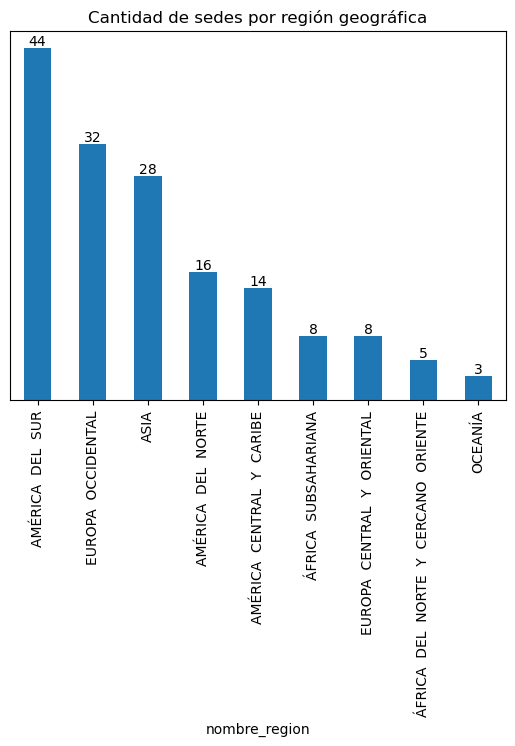

In [75]:
# Juntamos la información que necesitamos para poder generar esta visualización
df_sedes_pais = pd.merge(sede, pais, left_on='cod_pais', right_on='codigo')
df_sedes_pais_region = pd.merge(df_sedes_pais, region, left_on='region_id', right_on='id')
df_sedes_pais_region = df_sedes_pais_region.rename(columns = {'id_x' : 'sede_id', 'nombre_x':'nombre_pais', 'nombre_y':'nombre_region'})

print(df_sedes_pais_region.head())

# Creamos el gráfico de frecuencias
fig, ax = plt.subplots()

rcParams['font.family'] = 'sans-serif'           # Modifica el tipo de letra
rcParams['axes.spines.right'] = False            # Elimina linea derecha  del recuadro
rcParams['axes.spines.left']  = False            # Elimina linea derecha  del recuadro
rcParams['axes.spines.top']   = False            # Elimina linea superior del recuadro

ax = df_sedes_pais_region['nombre_region'].value_counts().plot.bar()

# Agregamos titulo, etiquetas a los ejes y limitamos el rango de valores de los ejes
ax.set_title('Cantidad de sedes por región geográfica')
ax.set_yticks([])                                  # Remueve los ticks del eje y
ax.bar_label(ax.containers[0], fontsize=10)        # Agrega la etiqueta a cada barra
ax.tick_params(axis='x', labelrotation=90)         # Rota las etiquetas del eje x para que las muestre horizontales

# Auditoría: evaluamos las medianas de los pbis al 2022 respectivos de las zonas geográficas en las que se
# encuentran sedes diplomáticas de la Argentina

print('Regiones geográficas ordenadas por la mediana de sus pbis al 2022 de forma ascendente:')
print('')
print(df_sedes_pais_region.groupby('nombre_region')['pbi_2022'].median().sort_values())
print('')
print('----------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------')
print('')
print('Paises ordenados por región y por su pbi al 2022 de forma ascendente:')
print('')
print(df_sedes_pais_region[['nombre_pais','nombre_region', 'pbi_2022']].sort_values(['nombre_region', 'pbi_2022']))
print('')
print('----------------------------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------------------------')#############################################')

Por cada región geográfica, del PBI per cápita 2022 de los países donde Argentina tiene una delegación. Toda la información que necesitamos para este gráfico podemos obtenerla de la misma fuente de datos utilizada en la visualización anterior: df_sedes_pais_region.

(0.0, 120000.0)

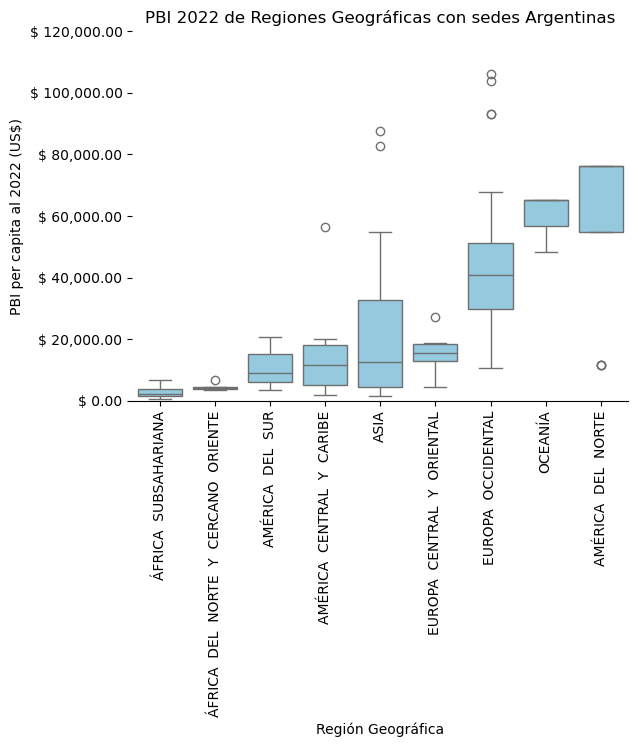

In [76]:
# Mostrar todos los boxplots en una misma figura, ordenados por la mediana de cada región: asumimos en orden Ascedente

# Extraemos todas las regiones de df_sedes_pais_region
regiones = df_sedes_pais_region['nombre_region'].unique().tolist()

# Calculamos las medianas con respecto al pbi del 2022 para cada región
medianas_pbi_regiones = {region: np.median(df_sedes_pais_region[df_sedes_pais_region['nombre_region'] == region]['pbi_2022']) for region in regiones}

# Ordenamos las regiones por las medianas calculadas
regiones_ordenadas_por_pbi = sorted(regiones, key=lambda x: medianas_pbi_regiones[x])

fig, ax = plt.subplots()

rcParams['font.family'] = 'sans-serif'           # Modifica el tipo de letra
rcParams['axes.spines.right']  = False           # Elimina linea derecha   del recuadro
rcParams['axes.spines.left']   = True            # Agrega  linea izquierda del recuadro
rcParams['axes.spines.top']    = False           # Elimina linea superior  del recuadro
rcParams['axes.spines.bottom'] = False           # Elimina linea inferior  del recuadro

ax = sns.boxplot(x="nombre_region",
                 y="pbi_2022",
                 hue="nombre_region",
                 data=df_sedes_pais_region,
                 palette={"skyblue"},
                 order=regiones_ordenadas_por_pbi
                 )

ax.set_title('PBI 2022 de Regiones Geográficas con sedes Argentinas')
ax.set_xlabel('Región Geográfica')
ax.set_ylabel('PBI per capita al 2022 (US$)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$ {x:,.2f}"));   # Agrega separador de decimales y signo $
ax.tick_params(axis='x', labelrotation=90)                               # Rota las etiquetas del eje x para que las muestre horizontales
ax.set_ylim(0,120000)


(0.0, 18000.0)

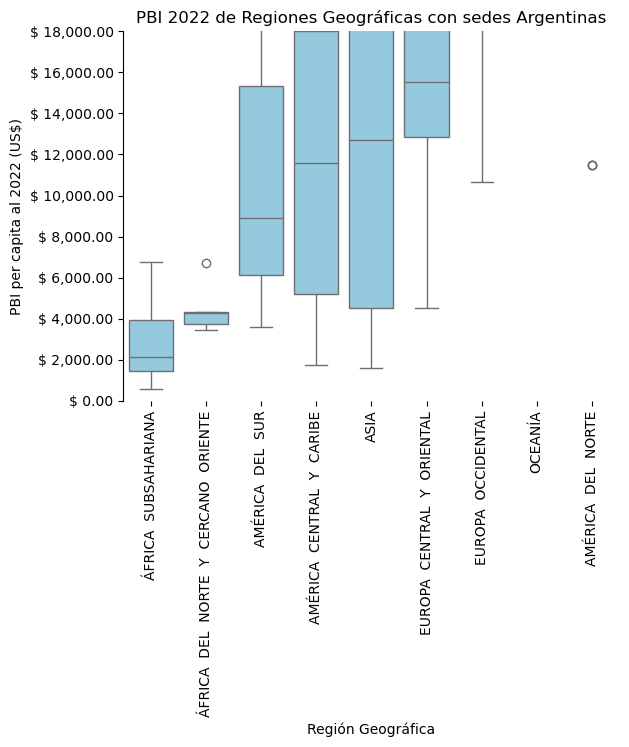

In [77]:
# Visualización anterior pero con zoom

fig, ax = plt.subplots()

rcParams['font.family'] = 'sans-serif'           # Modifica el tipo de letra
rcParams['axes.spines.right']  = False           # Elimina linea derecha   del recuadro
rcParams['axes.spines.left']   = True            # Agrega  linea izquierda del recuadro
rcParams['axes.spines.top']    = False           # Elimina linea superior  del recuadro
rcParams['axes.spines.bottom'] = False           # Elimina linea inferior  del recuadro

ax = sns.boxplot(x="nombre_region",
                 y="pbi_2022",
                 hue="nombre_region",
                 data=df_sedes_pais_region,
                 palette={"skyblue"},
                 order=regiones_ordenadas_por_pbi
                 )

ax.set_title('PBI 2022 de Regiones Geográficas con sedes Argentinas')
ax.set_xlabel('Región Geográfica')
ax.set_ylabel('PBI per capita al 2022 (US$)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("$ {x:,.2f}"))   # Agrega separador de decimales y signo $
ax.tick_params(axis='x', labelrotation=90)                               # Rota las etiquetas del eje x para que las muestre horizontales
ax.set_ylim(0,18000)


Relación entre el PBI per cápita de cada país (al año 2022) y la cantidad de sedes en el exterior que tiene Argentina en esos países.

                                nombre      pbi_2022  cant_sedes
42         REPÚBLICA  DE  EL  SALVADOR   5127.321668           1
53               REPÚBLICA  DE  PANAMÁ  17357.628634           1
52            REPÚBLICA  DE  NICARAGUA   2255.425995           1
51           REPÚBLICA  DE  MOZAMBIQUE    558.298606           1
49                REPÚBLICA  DE  KENYA   2099.301938           1
..                                 ...           ...         ...
37                REPÚBLICA  DE  CHILE  15355.479740           7
10  ESTADO  PLURINACIONAL  DE  BOLIVIA   3600.121635           7
75   REPÚBLICA  ORIENTAL  DEL  URUGUAY  20795.042354           8
11        ESTADOS  UNIDOS  DE  AMÉRICA  76329.582265           9
69  REPÚBLICA  FEDERATIVA  DEL  BRASIL   8917.674911          11

[86 rows x 3 columns]


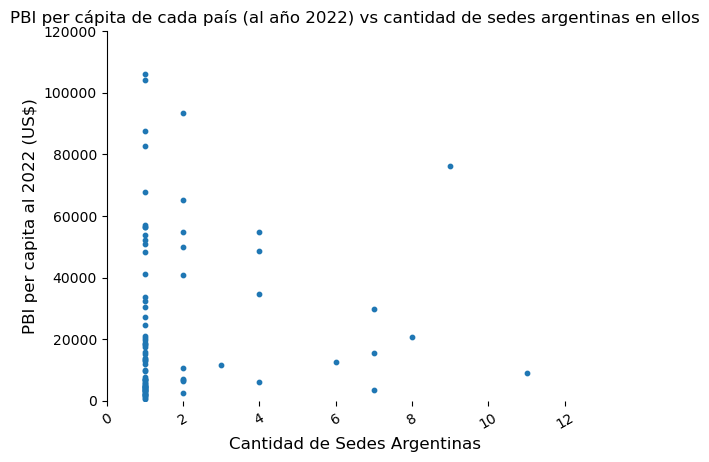

In [78]:
# Necesitamos 2 variables de cada país: su pbi al 2022 y la cantidad de sedes que tiene la Argentina en él

relacion_pbi_cantsedes = df_sedes_pais.groupby(['nombre', 'pbi_2022']).size().reset_index(name='cant_sedes')

# Genera el grafico que relaciona tres variables en simultaneo (mejorando la informacion mostrada)
fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'sans-serif'

ax.scatter(data=relacion_pbi_cantsedes,
           x='cant_sedes',
           y='pbi_2022',
           s=10)

ax.set_title('PBI per cápita de cada país (al año 2022) vs cantidad de sedes argentinas en ellos')
ax.set_ylabel('PBI per capita al 2022 (US$)', fontsize='large')
ax.set_xlabel('Cantidad de Sedes Argentinas', fontsize='large')
ax.set_ylim(0, 120000)
ax.set_xlim(0, 13)
ax.tick_params(axis='x', labelrotation=30)            # Rota las etiquetas del eje x para que las muestre horizontales

print(relacion_pbi_cantsedes.sort_values('cant_sedes'))